<a href="https://colab.research.google.com/github/saad1ibn2akhter/AI_Olympiad_problems_and_solutions/blob/main/steam_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

dfx =pd.read_csv('steam_train.csv')
df =dfx

test_df = pd.read_csv('steam_test.csv')




In [152]:
#subtask 1
df.head(2)
print(df['Estimated owners'].dtype)
df['Estimated owners'].head(1)
df[['low','high']] = df['Estimated owners'].str.split("-", expand=True).astype('int')
df['Avg owners'] = (df['high'] + df['low'])/2
df['Avg owners'].head(1)

test_df[['low','high']] = test_df['Estimated owners'].str.split("-", expand=True).astype('int')
test_df['Avg owners'] = (test_df['high'] + test_df['low'])/2

task1df = pd.DataFrame({
    'subtaskID':[1]*len(test_df),
    'datapointID':test_df['AppID'],
    'answer':test_df['Avg owners'].astype('int')
})

task1df.to_csv('output.csv', index=False)




object


In [153]:
df.head(2)

,AppID,Name,Release date,Estimated owners,Price,Metacritic score,Recommendations,Positive,Negative,Publishers,Genres,low,high,Avg owners
0,350110,TransOcean 2: Rivals,"May 10, 2016",100000 - 200000,29.99,69,428,305,281,astragon Entertainment,"Simulation,Strategy",100000,200000,150000.0
1,312780,Way of the Samurai 4,"July 23, 2015",200000 - 500000,24.99,72,1475,1288,318,"Spike Chunsoft Co., Ltd.","Action,Adventure",200000,500000,350000.0


In [154]:
df_data = df.drop(columns=['high' ,'low' , 'Genres' , 'Publishers','Name', 'AppID','Release date' , 'Estimated owners'],axis=1)
# df_data = df.drop(columns=['price'],axis=1)#dont need price as X var
df_data['Price'].head(2)

,Price
0,29.99
1,24.99


97


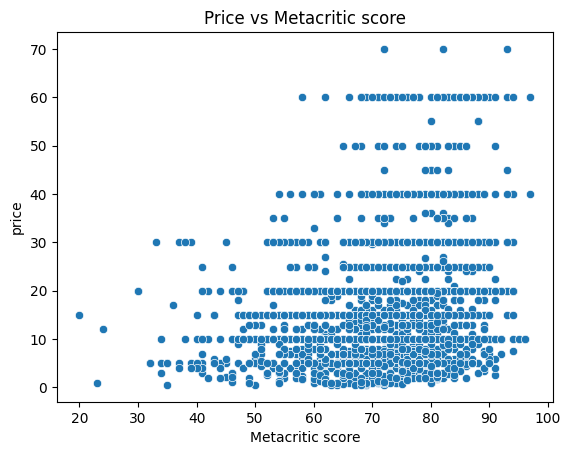

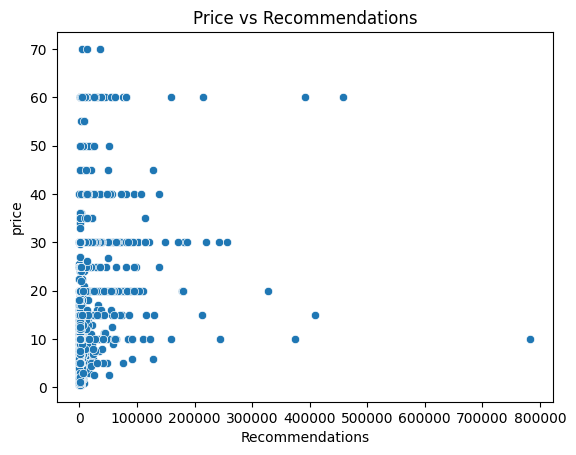

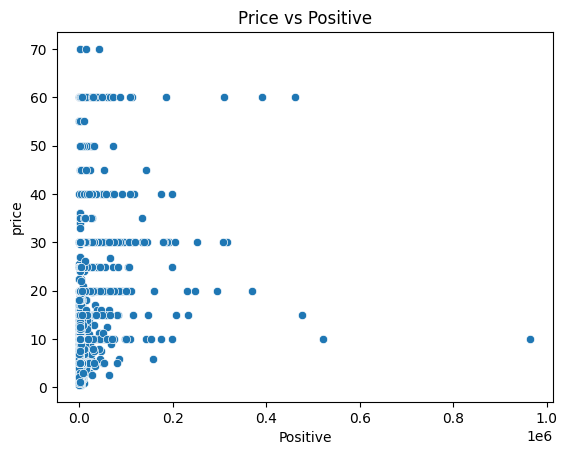

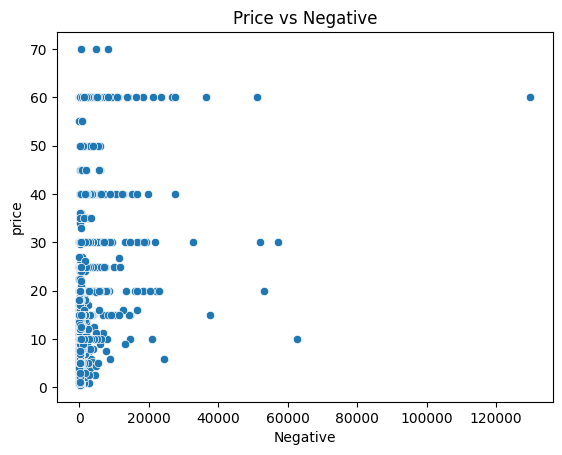

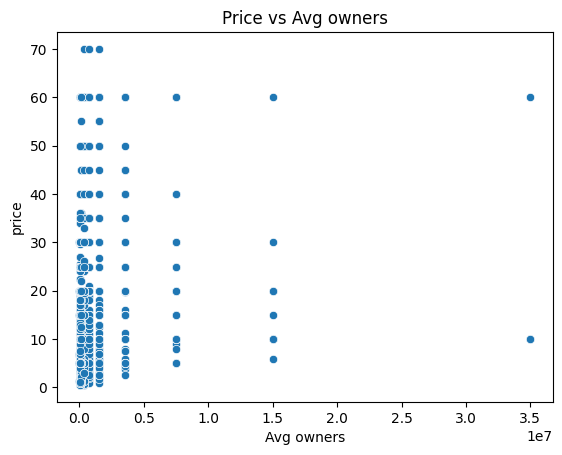

In [155]:

df_data.columns
cols = [ 'Metacritic score', 'Recommendations', 'Positive', 'Negative',
       'Avg owners']
print(df_data['Metacritic score'].max())
for i in cols:
  sns.scatterplot(x=df_data[i] , y = df_data['Price'])
  plt.title(f"Price vs {i}")
  plt.xlabel(f"{i}")
  plt.ylabel("price")
  plt.show()


In [156]:

X  = df_data.drop(columns=['Price'],axis=1)
y = df_data['Price']

X_train , X_test, y_train , y_test  = train_test_split(X,y, test_size=0.3 , random_state=1)

cols_test = [ 'Metacritic score', 'Recommendations', 'Positive', 'Negative','Avg owners']

model = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

model.fit(X,y)
yhat = model.predict(test_df[cols_test])

print(yhat[:2])

task2df = pd.DataFrame({
    'subtaskID':[2]*len(test_df),
    'datapointID':test_df['AppID'],
    'answer':yhat
})

task2df.to_csv('output.csv', index=False , mode='a', header=False)

fuck = pd.read_csv('output.csv')
print(fuck.columns)




[10.48786605 15.92350525]
Index(['subtaskID', 'datapointID', 'answer'], dtype='object')
